In [1]:
import scanpy as sc
from  os.path import join
import sys
import os
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
lib5 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\scripts'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
from termcolor import colored
import tables



# number of mitochondria reads vs. number of reads

count shape (5981, 23986)


<IPython.core.display.Javascript object>


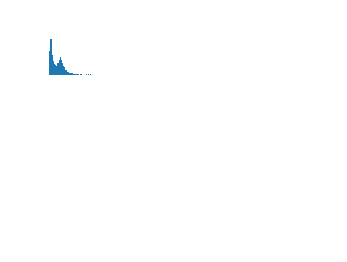

num of mitochondria genes 13
mitochondria genes ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
pearson correlation  (0.8175328673698923, 0.0)
counting_reads shape  (5981,)
counting_reads shape  (5981,)
number of cell having more than 0.7 mitochondria genes: 125


In [5]:
sample_id = 'M130'
sample = fr'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\Data\rna_seq200k\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')

fig, axs = plt.subplots(4, 2)

counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
mit = [s for s in genes if s.startswith('MT-')]
print(f'num of mitochondria genes {len(mit)}')
print(f'mitochondria genes {mit}')
print(f'pearson correlation  {pearsonr(counting_reads, mitochondria_genes)}')
print(f'counting_reads shape  {counting_reads.shape}')
print(f'counting_reads shape  {mitochondria_genes.shape}')



# plot 1 - cell reads intensity
axs[0, 0].hist(counting_reads, bins=150)
axs[0, 0].set_title("cell reads intensity")
axs[0, 0].set_ylabel('number of reads')
axs[0, 0].set_xlabel('indexes')



# plot 2
axs[0, 1].hist(mitochondria_genes, bins=100)
axs[0, 1].set_title("mitochondria reads intensity")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')



# plot 3
axs[1, 0].plot(mitochondria_genes, counting_reads, 'ro')
axs[1, 0].set_title("reads intensity X mitochondria reads intensity")
axs[1, 0].set_xlabel('number of mitochondria reads')
axs[1, 0].set_ylabel('number of reads')


# plot 4
rand = random.choices(range(len(counting_reads)), k=300)
axs[1, 1].plot(mitochondria_genes[rand], counting_reads[rand], 'ro')
axs[1, 1].set_title("reads intensity X mitochondria reads intensity")
axs[1, 1].set_xlabel('number of mitochondria reads')
axs[1, 1].set_ylabel('number of reads')



# plot 5
indexes = np.where(counting_reads<8000)
counting_reads_small = counting_reads[indexes]
mitochondria_genes_small = mitochondria_genes[indexes]
axs[2, 0].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 0].set_title("reads intensity X mitochondria reads intensity")
axs[2, 0].set_xlabel('number of mitochondria reads')
axs[2, 0].set_ylabel('number of reads')


# plot 6
indexes = np.where(counting_reads<2000)
rand = random.choices(range(len(sum(indexes))), k=300)
counting_reads_small = counting_reads[indexes][rand]
mitochondria_genes_small = mitochondria_genes[indexes][rand]
axs[2, 1].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 1].set_title("reads intensity X mitochondria reads intensity")
axs[2, 1].set_xlabel('number of mitochondria reads')
axs[2, 1].set_ylabel('number of reads')



# plot 7
# indexes = np.where(counting_reads<1000)
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
res = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)
axs[3, 0].hist(res, bins=40)
axs[3, 0].set_title("retion reads & mitochondria reads")



# plot 8
ratio_of_interest = 0.7
indexes = np.where(res>ratio_of_interest)
axs[3, 1].plot(mitochondria_genes[indexes], counting_reads[indexes], 'ro')
axs[3, 1].set_title(f"ratio higher than {ratio_of_interest}")
axs[3, 1].set_xlabel('number of mitochondria reads')
axs[3, 1].set_ylabel('number of reads')
print(f'number of cell having more than {ratio_of_interest} mitochondria genes: {len(mitochondria_genes[indexes])}')



# number of mitochondria reads vs. number of reads

In [ ]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact([[7, 2], [2, 7]])
pvalue

In [ ]:
# sample_id = 'M110'
sample = r'D:\Technion studies\Keren Laboratory\Data\droplet_seq\Cohort\cohort_all_samples_3.2.21.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts

In [51]:
cls1 = random.sample(range(data.number_of_cells), k = int(data.number_of_cells/2))
cls2 = [ii for ii in range(data.number_of_cells) if not ii in cls1]

In [70]:
gene_idx = data.gene_names.index('CD3E')
gene_cls1 = data.counts[cls1, gene_idx]
gene_cls2 = data.counts[cls2, gene_idx]


In [80]:
sum(gene_cls1>1)
sum(gene_cls2>1)
# len(gene_cls1)

oddsratio, pvalue = stats.fisher_exact([[sum(gene_cls1>1), sum(gene_cls2>1)], 
                                        [len(gene_cls1), len(gene_cls2)]])
pvalue

0.8606385214395829

In [88]:
t_cell_indices = [idx for idx, cell_type_list in enumerate(data.cells_information.getattr('cell_type_list')) if 'T cells' in cell_type_list]
not_t_cell_indices = [idx for idx in range(data.number_of_cells) if not idx in t_cell_indices]

In [139]:
gene_idx = data.gene_names.index('CD3E')
gene_cls1 = data.counts[t_cell_indices, gene_idx]
gene_cls2 = data.counts[not_t_cell_indices, gene_idx]

oddsratio, pvalue = stats.fisher_exact([[sum(gene_cls1>1), sum(gene_cls2>1)], 
                                        [len(gene_cls1), len(gene_cls2)]])
pvalue

0.0

In [137]:
print([[sum(gene_cls1>1), sum(gene_cls2>1)], 
                                        [len(gene_cls1), len(gene_cls2)]])


[[960, 255], [964, 257]]


In [96]:
sum([not 'T cells' in ii for ii in data[t_cell_indices].cells_information.getattr('cell_type_list')])

0

In [17]:
# dd = data[not_t_cell_indices][(gene_cls2>1).tolist()]

def print_c(c_inf):
    print(f'cell_type_list: {c_inf.cell_type_list}')
    print(f'conflict_related_cell_types: {c_inf.conflict_related_cell_types}')
    print(f'is_apoptosis: {c_inf.is_apoptosis}')
    print(f'is_immune: {c_inf.is_immune}')
    print(f'is_cancer: {c_inf.is_cancer}')
    print(f'cancer_immune_conflict: {c_inf.cancer_immune_conflict}')
    print(f'is_doublet: {c_inf.is_doublet}')
    print(f'is_lymphoid: {c_inf.is_lymphoid}')
    print(f'is_myeloid: {c_inf.is_myeloid}')
    print(f'is_stromal: {c_inf.is_stromal}')
#     print(f'inferCNV: {c_inf.inferCNV}')
    print(f'should_be_removed: {c_inf.should_be_removed}')
#     print(f'count_insertions: {c_inf.count_insertions}')
#     print(f'count_deletions: {c_inf.count_deletions}')


clusters = [random.choice([1,2,3]) for _ in range(10)]

clusters


[3, 2, 1, 1, 2, 3, 3, 3, 3, 3]

In [23]:
import statsmodels as sm
import scipy.stats as stats



percentage_voting_expression_in_clusters = []
p_values = [] # before correction
for cluster in list(set(clusters)):
    print(cluster)
    cluster_indices = [idx for idx, val in enumerate(clusters) if val==cluster]
    other_clusters_indices = [idx for idx, val in enumerate(clusters) if val!=cluster]
#     print(cls_indices)
    
    cluster_data = data[cluster_indices]
    other_clusters_data = data[other_clusters_indices]
    # statistical test for each gene
    for gene_idx in range(data.number_of_genes):
        cluster_gene_expression = cluster_data.counts[:, gene_idx] > 1
        other_clusters_gene_expression = other_clusters_data.counts[:, gene_idx] > 1
        
        number_of_cells_expressing_gene_in_cluster = sum(cluster_gene_expression)
        number_of_cells_expressing_gene_in_other_clusters = sum(other_clusters_gene_expression)
        
        n_cells_in_cluster = len(cluster_gene_expression)
        n_cells_in_other_clusters = len(other_clusters_gene_expression)
        
        oddsratio, pvalue = stats.fisher_exact([[number_of_cells_expressing_gene_in_cluster, 
                                                 number_of_cells_expressing_gene_in_other_clusters], 
                                        [n_cells_in_cluster, n_cells_in_other_clusters]])
        
        p_voting_expression_in_cluster = number_of_cells_expressing_gene_in_cluster / n_cells_in_cluster
        
        
        percentage_voting_expression_in_clusters.append(p_voting_expression_in_cluster)
        p_values.append(pvalue)
        

        
sm.stats.multitest.multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

1
[2, 3]
2
[1, 4]
3
[0, 5, 6, 7, 8, 9]


In [136]:
print_c(dd.cells_information[6])

cell_type_list: ['Immune_general', 'Exhausted T cells', 'Regulatory CD4 T cells']
conflict_related_cell_types: ['T cells', 'CD4 helper T cells', 'Regulatory T cells', 'Regulatory T cells']
is_apoptosis: False
is_immune: True
is_cancer: False
cancer_immune_conflict: False
is_doublet: False
is_lymphoid: True
is_myeloid: False
is_stromal: False
should_be_removed: False


In [14]:
import statsmodels as sm
sm.stats.multitest.multipletests([0.01, 0.02, 0.04, 0.15], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

(array([ True,  True, False, False]),
 array([0.04      , 0.04      , 0.05333333, 0.15      ]),
 0.012741455098566168,
 0.0125)

In [3]:
sample_id = 'M109'

sample = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21\{sample_id}.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')

count shape (21987, 7832)


In [22]:
data = data[[not aa for aa in data.cells_information.getattr('should_be_removed')]]
cc = data.cells_information.getattr('is_cancer')
mm = data.cells_information.getattr('is_immune')
ss = data.cells_information.getattr('is_stromal')
ind = [cc[ii] or mm[ii] or ss[ii] for ii in range(len(cc))]
sum(ind)/len(ind)
# ind

0.9953503819329127

In [54]:
data.counts.shape



(7832, 21987)

In [4]:
arr = data.counts.flatten()

In [6]:
arr2 = arr[arr!=0]

In [17]:
# print(arr.shape)
# print(arr2.shape)
# counts
# counts[np.argsort(counts)]
arr3 = np.log(arr2)

In [36]:
arr3[:10][np.argsort(arr3[:10])]
np.arange(arr3[:10].shape[0])


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

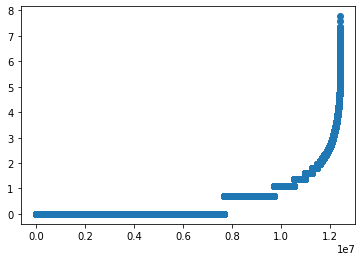

In [40]:
# print(data.counts.mean(axis=0).shape)
# counts, bins = np.histogram(arr2[:1000])
# plt.hist(bins[:-1], bins, weights=counts)
# np.argmax(data.counts)

plt.scatter(np.arange(arr3.shape[0]), arr3[np.argsort(arr3)])

10000.0


c:\users\itay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  


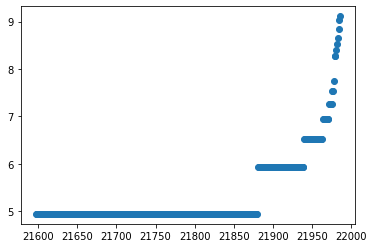

In [98]:
cell0 = data.counts[0]


cell0_sum = cell0.sum()
scalling_factor = cell0_sum/10000
print(cell0_sum/scalling_factor)

vv = np.log2(cell0/scalling_factor)+1
plt.scatter(np.arange(vv.shape[0]), vv[np.argsort(vv)])

In [99]:
from collections import Counter
Counter(vv)

Counter({-inf: 21597,
         4.941198646383814: 284,
         6.52616114710497: 24,
         5.941198646383814: 59,
         6.941198646383814: 8,
         8.40063026502111: 1,
         8.263126741271176: 2,
         9.111123647826126: 1,
         7.52616114710497: 2,
         7.263126741271177: 4,
         7.748553568441418: 1,
         8.52616114710497: 1,
         9.028661487634153: 1,
         8.641638364524905: 1,
         8.848089241992334: 1})

In [130]:
print(data.counts.shape)

sum_cells = data.counts.sum(axis=1) # for each cell
scaling_factors = sum_cells / 10000

normalized = np.log2((data.counts/scaling_factors[:,None]))+1
normalized[np.isneginf(normalized)] = 0





(7832, 21987)


c:\users\itay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


In [133]:


# Counter(normalized[1].tolist())

gene_indexes [15717, 15718]
mean 1.0
median 1.0
max 65535
min 1


{'whiskers': [<matplotlib.lines.Line2D at 0x21610f0e978>,
 'caps': [<matplotlib.lines.Line2D at 0x2160d8c79b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21610f0eba8>],
 'medians': [<matplotlib.lines.Line2D at 0x21610f08dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21613c6b828>],
 'means': []}

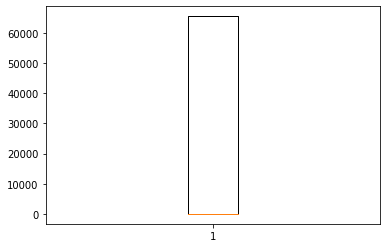

In [183]:
d_gene = 'SNURF'

gene_indexes = [idx for idx, gg in enumerate(data.gene_names) if gg==d_gene]
print(f'gene_indexes {gene_indexes}')

indices = data.counts[:, gene_indexes[0]] != data.counts[:, gene_indexes[1]]


diff = np.abs(data.counts[indices, gene_indexes[0]] - data.counts[indices, gene_indexes[1]])

med = np.median(diff)
mean = np.median(diff)
_max = np.max(diff)
_min = np.min(diff)
print(f'mean {mean}')
print(f'median {med}')
print(f'max {_max}')
print(f'min {_min}')

pyplot.boxplot(diff)

In [203]:
diff.dtype

dtype('uint16')

In [204]:

lsts = []
for i in range(3):
    lsts.append(np.random.rand(10000,30000).astype(np.uint16))

MemoryError: Unable to allocate array with shape (10000, 30000) and data type uint16

In [201]:
np.concatenate([lsts[0],lsts[1]]).shape

MemoryError: Unable to allocate array with shape (20000, 30000) and data type float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2160eef2400>,
 'caps': [<matplotlib.lines.Line2D at 0x21610e4def0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2160eee7b70>],
 'medians': [<matplotlib.lines.Line2D at 0x21610e52da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2160ef228d0>],
 'means': []}

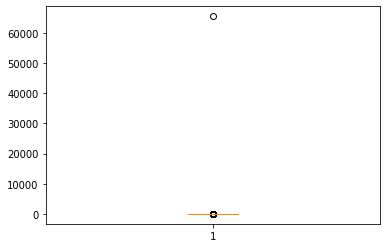

In [44]:
INFERCNV_SAMPLES_PATH = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\executions\all_data_31.12.20'
tumor_file = r'infercnv.observations.txt'
with open(join(INFERCNV_SAMPLES_PATH, sample_id, tumor_file), 'r') as f:
    line = f.readline()
    barcodes_length = len(line[:-1].split(' '))
    print(f'number of barcodes {barcodes_length}')
    barcodes = [ii.replace('\"', '') for ii in line.split(' ')]
    barcodes[-1] = barcodes[-1][:-1]

number of barcodes 5711


In [48]:
sorted([barcodes.index(aa) for aa in su_barcodes])


[4901,
 4903,
 4908,
 4910,
 4915,
 4917,
 4919,
 4935,
 4936,
 4938,
 4939,
 4942,
 4943,
 4944,
 4948,
 4950,
 4951,
 4952,
 4953,
 4955,
 4957,
 4958,
 4963,
 4970,
 4971,
 4976,
 4978,
 4988]

In [250]:
# res = np.divide(mitochondria_genes_small, counting_reads_small, out=np.zeros_like(counting_reads_small), where=b!=counting_reads_small)
# np.sort(res)
# res = np.divide(mitochondria_genes_small, counting_reads_small, out=np.zeros_like(counting_reads_small), where=b!=counting_reads_small)
# plt.hist(res, bins=30)
# plt.title("ratio")
# plt.show()



In [192]:
# plot 2
uniform = np.arange(len(counting_reads))
axs[0, 1].plot(uniform, sorted(counting_reads), 'b')
axs[0, 1].set_title("reads distribution")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')

Text(0.5, 1033.1471323529413, 'indexes')

In [18]:
sample_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\apoptosis\16.12.20_empty_kept\M100\M100.pkl'


rna_sample = pickle.load(open(sample_path, 'rb'))

In [19]:
sum(rna_sample.cells_information.getattr('is_cancer'))

164